# Завдання 1​
Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [2]:
import pandas as pd

# Зантажуймо
df_2d = pd.read_csv('data_2d.csv')
df_mnist = pd.read_csv('mnist.csv')

# Перевіримо перші кілька рядків кожного датасету
display(df_2d.head())
display(df_mnist.head())


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### K-means та ліктевий метод
Спочатку реалізуємо кластеризацію для двовимірного датасету.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


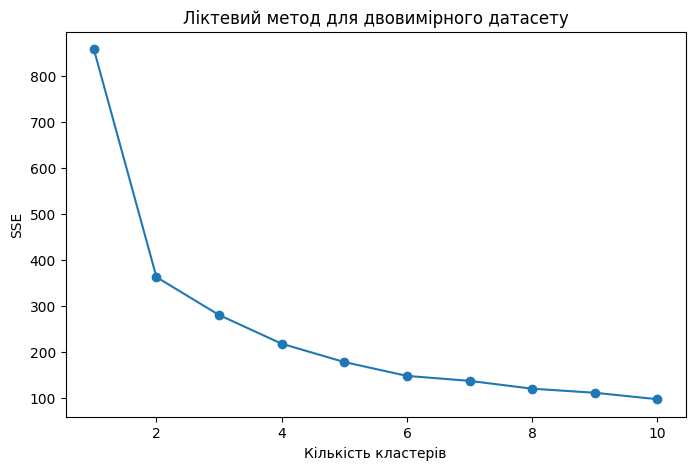

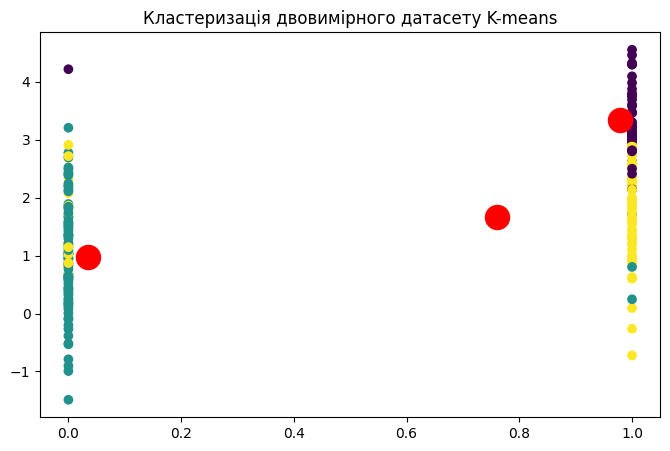

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Підготовка даних
X_2d = df_2d.values

# Ліктевий метод для визначення оптимальної кількості кластерів
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_2d)
    sse.append(kmeans.inertia_)

# Візуалізація ліктевого методу
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Ліктевий метод для двовимірного датасету')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.show()

# Обрання оптимальної кількості кластерів
optimal_clusters_2d = 3  # Наприклад, визначили, що оптимальна кількість - 3

# Застосування K-means з оптимальною кількістю кластерів
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, random_state=0)
clusters_2d = kmeans_2d.fit_predict(X_2d)

# Візуалізація результатів кластеризації
plt.figure(figsize=(8, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_2d, cmap='viridis')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='red')
plt.title('Кластеризація двовимірного датасету K-means')
plt.show()


K-means та ліктевий метод до MNIST датасету.

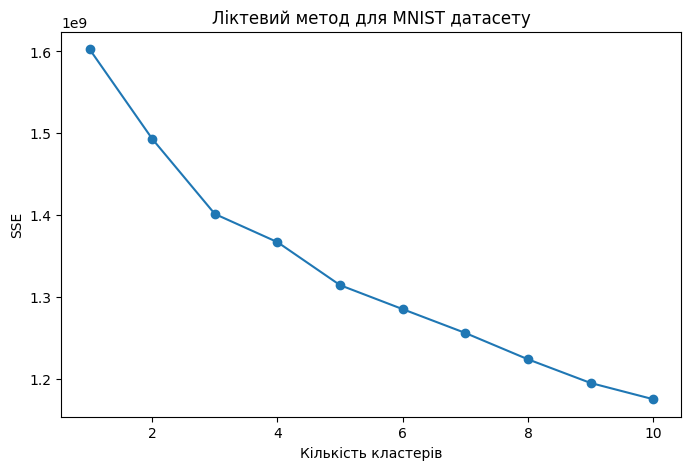

In [4]:
# Підготовка даних
X_mnist = df_mnist.values

# Ліктевий метод для визначення оптимальної кількості кластерів
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_mnist)
    sse.append(kmeans.inertia_)

# Візуалізація ліктевого методу
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Ліктевий метод для MNIST датасету')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.show()


# Завдання 2

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


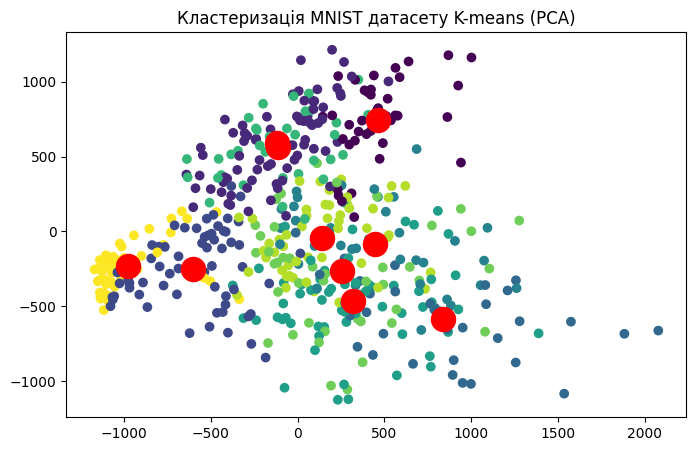

In [10]:

# Обрання оптимальної кількості кластерів
optimal_clusters_mnist = 10  # Наприклад, визначили, що оптимальна кількість - 10

# Застосування K-means з оптимальною кількістю кластерів
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, random_state=0)
clusters_mnist = kmeans_mnist.fit_predict(X_mnist)

# Використання PCA для зменшення розмірності
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

# Візуалізація результатів кластеризації (перші дві компоненти PCA)
plt.figure(figsize=(8, 5))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=clusters_mnist, cmap='viridis')
plt.scatter(pca.transform(kmeans_mnist.cluster_centers_)[:, 0], pca.transform(kmeans_mnist.cluster_centers_)[:, 1], s=300, c='red')
plt.title('Кластеризація MNIST датасету K-means (PCA)')
plt.show()


Для MNIST датасету використовується алгоритм PCA для зменшення розмірності до 2 вимірів перед візуалізацією.